<a href="https://colab.research.google.com/github/bryandelgado99/Fundamentos-de-IA/blob/main/Examen_1__Delgado_Bryan__Revelo_Ingrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exámen Bimmestral 1 - Redes Neuronales

Nombres: Delgado Bryan, Revelo Ingrith
Fecha: 08/01/2024

El propósito de esta evaluación es crear una red neuronal para que a través de un peso (kg) y tiempo (minutos) dado determine las kilocalorías que se va a quemar con la actividad física de correr (9.6 km/h).

Partimos de la fórmula: KCAL = (MET (ver valores de la tabla) x 0,0175 x peso (kg))*tiempo

In [1]:
# Importamos las librerías
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. Importamos el archivo
datos=pd.read_excel("/content/kilocalorias.xlsx")
#Muestra los datos
datos.head()
#Describe las características del datasheet
datos.describe()

,Peso,Tiempo,Kilocalorias
count,100.000000,100.000000,100.000000
mean,74.980000,30.820000,405.196750
std,14.573381,16.089635,229.147575
min,50.000000,5.000000,52.500000
25%,62.500000,17.000000,221.112500
50%,75.500000,29.000000,395.850000
75%,88.250000,46.000000,576.187500
max,100.000000,60.000000,927.675000


In [3]:
# 2. Separamos los datos por características
x = datos[['Peso', 'Tiempo']]
y = datos['Kilocalorias']

In [4]:
# 3. Dividimos datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=25)

In [5]:
# 4. Creamos las capas del modelo, mediante las unidades de cómputo y los elementos
# La capa de entrada toma los valores de X y los analiza, tomando comportamientos comunes
capa_entrada = tf.keras.layers.Dense(units=2, input_shape=[2]) #Las input_shapes corresponden a los elementos de X obtenidos en el paso 3
# La capa de salida presenta la predicción analítica final de las capas anteriores
capa_salida = tf.keras.layers.Dense(units=1)
# Las capa ocultas procesan la información las une en partes comunes, para facilitar el tratamiento del modelo
capa_oculta_A = tf.keras.layers.Dense(units=2)
capa_oculta_B = tf.keras.layers.Dense(units=2)
# Definición del modelo
modelo = tf.keras.Sequential([capa_entrada, capa_oculta_A, capa_oculta_B, capa_salida])

In [6]:
# 5. Definimos el modelo con Tensorflow - Keras y lo compilamos mediante 'adams'
modelo.compile(optimizer='adam', loss='mean_squared_error')

In [71]:
# 5. Entrenamos el modelo con una base de epochs de 100 y batch de 3
historial = modelo.fit(x_train, y_train, epochs=10, batch_size=10)
print(historial)

Epoch 1/10
8/8 [==============================] - 0s 10ms/step - loss: 4862.5552
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 4859.9966
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 4870.4839
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 4886.5156
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 4868.8511
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 4873.5845
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 4876.7388
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 4872.1919
Epoch 9/10
8/8 [==============================] - 0s 4ms/step - loss: 4871.3945
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 4871.3945


In [78]:
# 8. Evaluamos el modelo y definimos la pérdida de datos
prueba =  modelo.evaluate(x_test, y_test)
print(f"El modelo predicho es de {prueba}")

1/1 [==============================] - 0s 27ms/step - loss: 6039.3525
El modelo predicho es de 6039.3525390625


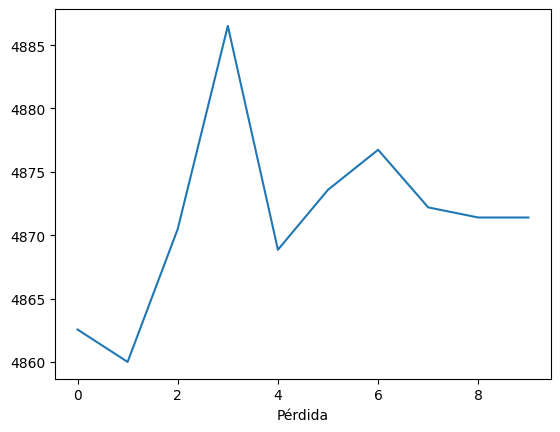

In [74]:
# 5.5 Gráfica para función de pérdida
plt.plot(historial.history["loss"])
x = plt.xlabel("Pérdida")

# Custionario de ejercicios de test del modelo

In [79]:
## 75kg y 30 minutos
data_x = np.array([[75, 30]])

prediccion = modelo.predict([data_x])
print(f"Para una persona que pesa 75 kg y corre a 9.6km/h en un tiempo de 30 minutos, quema aproxidamante {prediccion} kcal.")

1/1 [==============================] - 0s 22ms/step
Para una persona que pesa 75 kg y corre a 9.6km/h en un tiempo de 30 minutos, quema aproxidamante [[411.05338]] kcal.


In [76]:
## 50kg y 45 minutos
data_x = np.array([[50, 45]])

prediccion = modelo.predict([data_x])
print(f"Para una persona que pesa 50 kg y corre a 9.6km/h en un tiempo de 45 minutos, quema aproxidamante {prediccion} kcal.")

1/1 [==============================] - 0s 34ms/step
Para una persona que pesa 50 kg y corre a 9.6km/h en un tiempo de 45 minutos, quema aproxidamante [[539.57385]] kcal.


In [77]:
## 90kg y 60 minutos
data_x = np.array([[90, 60]])

prediccion = modelo.predict([data_x])
print(f"Para una persona que pesa 90 kg y corre a 9.6km/h en un tiempo de 60 minutos, quema aproxidamante {prediccion} kcal.")

1/1 [==============================] - 0s 28ms/step
Para una persona que pesa 90 kg y corre a 9.6km/h en un tiempo de 60 minutos, quema aproxidamante [[792.58777]] kcal.
